In [2]:
# ------------------ 1. Introduction & Libraries ------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
# ------------------ 2. Load Dataset ------------------
df = pd.read_csv("data.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1461, 12)


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [4]:
# ------------------ 3. Data Overview ------------------
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


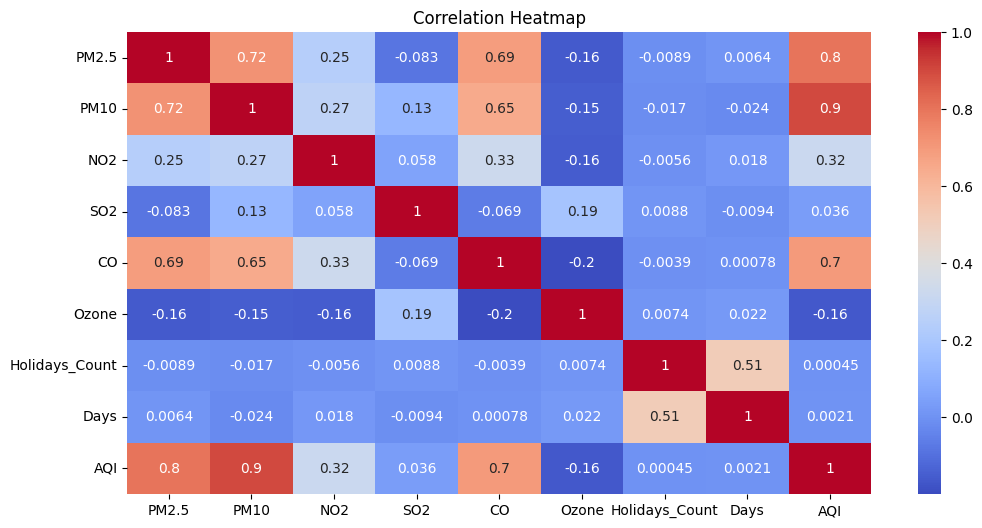

In [5]:
# ------------------ 4. Visualizations ------------------
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'Holidays_Count', 'Days']
target = 'AQI'

# 4.1 Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


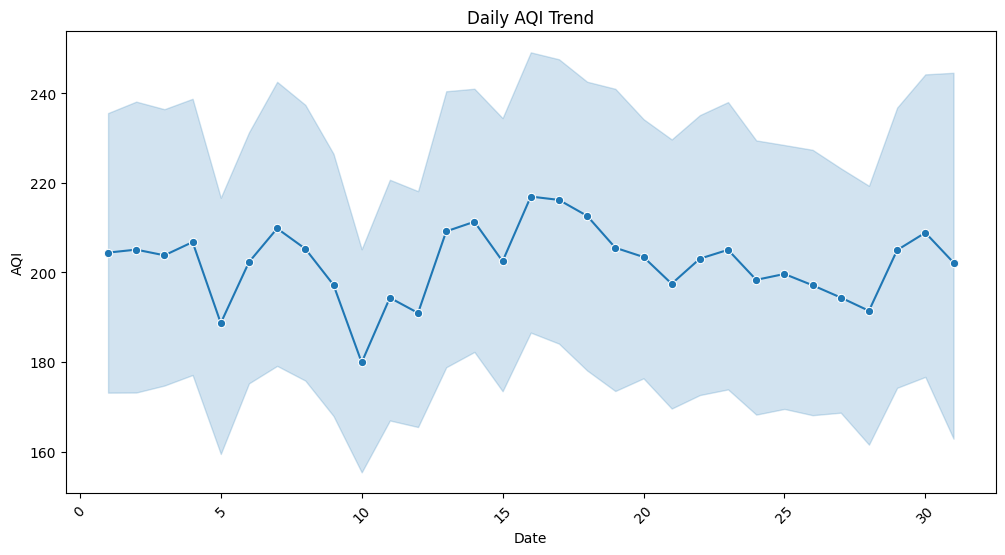

In [6]:
# 4.2 AQI Trend Over Days
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="AQI", marker="o")
plt.title("Daily AQI Trend")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.show()

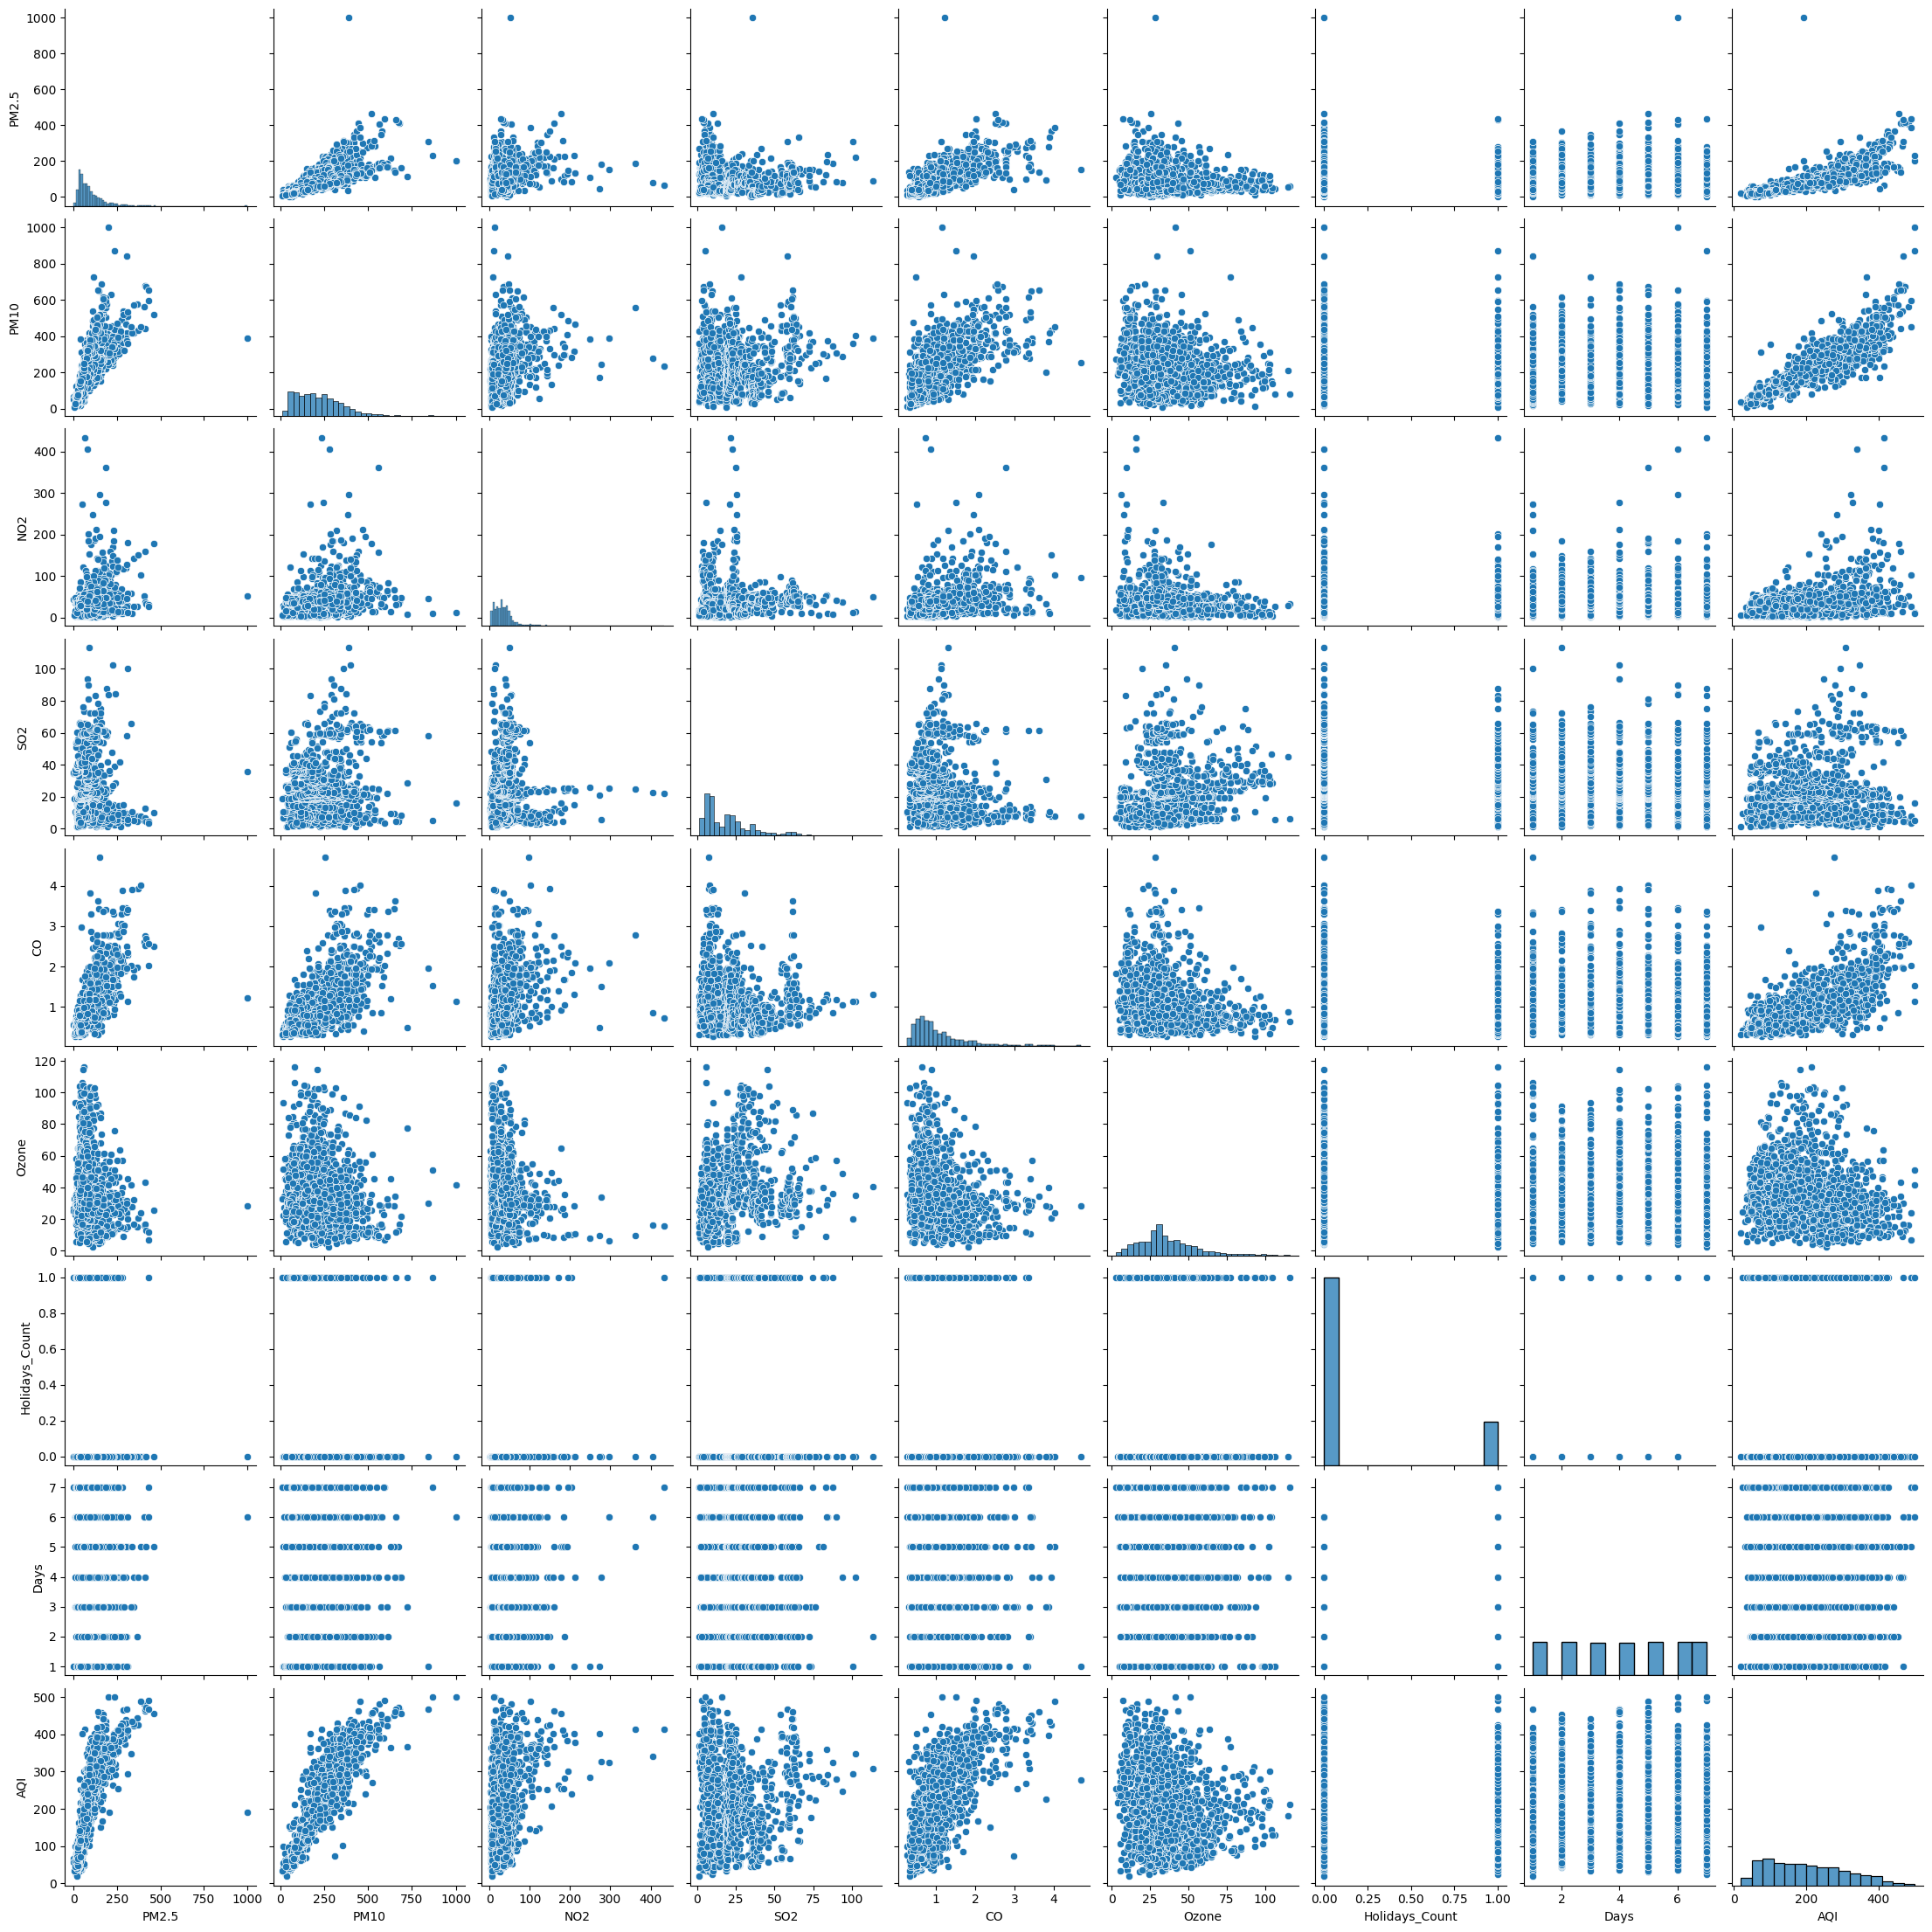

In [7]:
# 4.3 Pairplot of Pollutants & AQI
sns.pairplot(df[features + [target]])
plt.show()

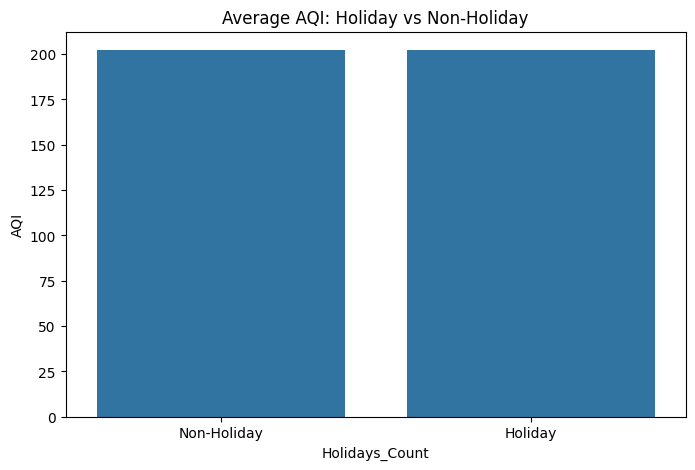

In [8]:
# 4.4 AQI by Holiday vs Non-Holiday
holiday_data = df.groupby("Holidays_Count")["AQI"].mean().reset_index()
holiday_data["Holidays_Count"] = holiday_data["Holidays_Count"].map({0: "Non-Holiday", 1: "Holiday"})
plt.figure(figsize=(8,5))
sns.barplot(data=holiday_data, x="Holidays_Count", y="AQI")
plt.title("Average AQI: Holiday vs Non-Holiday")
plt.show()

In [9]:
# ------------------ 5. Model Training ------------------
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:\nMean Absolute Error (MAE): {mae:.2f}\nR² Score: {r2:.2f}")


Model Performance:
Mean Absolute Error (MAE): 18.65
R² Score: 0.94


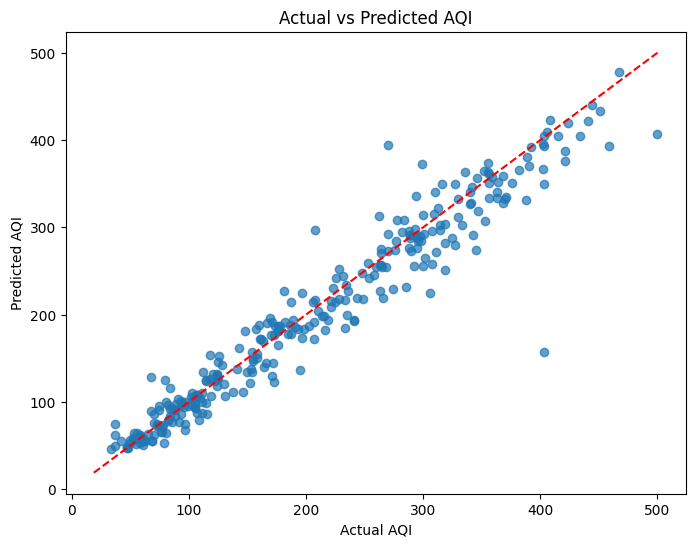

In [10]:
# Actual vs Predicted Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()

In [11]:

# ------------------ 6. Predict AQI (Custom Inputs) ------------------
# Example custom input
input_data = {
    'PM2.5': 120.0,
    'PM10': 200.0,
    'NO2': 45.0,
    'SO2': 15.0,
    'CO': 1.2,
    'Ozone': 30.0,
    'Holidays_Count': 0,
    'Days': 150
}

In [12]:
input_df = pd.DataFrame([input_data])
predicted_aqi = model.predict(input_df)[0]
print(f"\nPredicted AQI for custom input: {predicted_aqi:.2f}")


Predicted AQI for custom input: 253.40
